In [2]:
import pandas as pd
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import RocCurveDisplay
warnings.filterwarnings("ignore")

In [3]:
url = 'https://drive.google.com/file/d/1m0B-ur9NxnTPGuN_LjHL3mwN72ZYCZB3/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df_admitsFYI = pd.read_csv(url)

In [4]:
df_admitsFYI.head()

,University,Status,Target Major,Term,GRE Verbal,GRE Quantitative,GRE Writing,GRE Total,TOEFL/IELTS,UG College,UG Major,GPA,Papers,Work Exp
0,Bowling Green State University,Reject,Computer Science,Fall 2015,135.0,146.0,3.0,281.0,6.0,SIES Graduate School of Technology,Information Technology,56.00,NaN,0 Mo
1,Bowling Green State University,Admit,Computer Science,Spring 2017,170.0,147.0,4.0,317.0,100.0,thapathali engineering campus,ECE,74.80,NaN,0 Mo
2,Bowling Green State University,Admit,Computer Science,Fall 2016,NaN,NaN,NaN,NaN,6.0,mic college of technology,Computer Science,60.00,NaN,0 Mo
3,Bowling Green State University,Reject,Computer Science,Fall 2016,148.0,133.0,3.0,281.0,6.5,Vellore Institute of Technology,Computer Science,7.23,NaN,0 Mo
4,Bowling Green State University,Admit,Computer Science,Spring 2016,147.0,136.0,2.0,283.0,6.0,Gitam University,Computer Science,7.00,NaN,0 Mo


In [5]:
df_admitsFYI.describe()

,GRE Verbal,GRE Quantitative,GRE Writing,GRE Total,TOEFL/IELTS,GPA,Papers
count,37867.000000,37869.000000,34981.000000,37862.000000,37603.000000,38612.000000,14644.000000
mean,160.844482,150.359951,3.394412,311.204902,82.039133,31.086302,0.322180
std,5.788238,6.813075,0.836266,10.669447,40.134167,30.256490,0.752966
min,130.000000,130.000000,0.000000,260.000000,0.000000,0.000000,0.000000
25%,157.000000,146.000000,3.000000,304.000000,85.000000,7.800000,0.000000
50%,161.000000,150.000000,3.500000,312.000000,100.000000,8.780000,0.000000
75%,165.000000,155.000000,4.000000,319.000000,108.000000,65.000000,0.000000
max,170.000000,170.000000,6.000000,340.000000,120.000000,100.000000,11.000000


In [6]:
df_admitsFYI.dropna(subset=['GRE Verbal', 'GRE Quantitative', 'GRE Writing', 'GRE Total', 'GPA', ], inplace=True)

In [7]:
df_admitsFYI['Papers'].fillna(0.0, inplace=True)

In [8]:
terms_to_drop = [
    "Fall -1", "Nd 2015", "Summer 2013", "Summer 2013", "Spring 2007",
    "Summer 2015", "Spring 2008", "Summer 2011", "Fall 2005", "Nd 2013",
    "Spring 2009", "Spring -1", "-2"
]

In [9]:
df_admitsFYI = df_admitsFYI[~df_admitsFYI['Term'].isin(terms_to_drop)]

df_admitsFYI[['Season', 'Year']] = df_admitsFYI['Term'].str.split(' ', expand=True)

df_admitsFYI.drop(columns=['Term'], inplace=True)

In [10]:
df_admitsFYI['GPA'] = df_admitsFYI['GPA'].apply(lambda x: (x / 10) * 4 if pd.notnull(x) and x <=10 else (x / 100) * 4)

In [11]:
df_admitsFYI['Work Exp'] = df_admitsFYI['Work Exp'].str.replace(' Mo', '')

In [12]:
df_admitsFYI['Status'] = df_admitsFYI['Status'].map({'Admit': 1, 'Reject': 0})

In [13]:
df_admitsFYI['TOEFL'] = 0.0
df_admitsFYI['IELTS'] = 0.0

#filter TOEFL (val > 9)
df_admitsFYI.loc[df_admitsFYI['TOEFL/IELTS'] > 9, 'TOEFL'] = df_admitsFYI['TOEFL/IELTS']
#filter IELTS (val <= 9)
df_admitsFYI.loc[df_admitsFYI['TOEFL/IELTS'] <= 9, 'IELTS'] = df_admitsFYI['TOEFL/IELTS']

df_admitsFYI.drop(['TOEFL/IELTS'], axis=1, inplace=True)

In [14]:
display(df_admitsFYI.head(5))

,University,Status,Target Major,GRE Verbal,GRE Quantitative,GRE Writing,GRE Total,UG College,UG Major,GPA,Papers,Work Exp,Season,Year,TOEFL,IELTS
0,Bowling Green State University,0,Computer Science,135.0,146.0,3.0,281.0,SIES Graduate School of Technology,Information Technology,2.240,0.0,0,Fall,2015,0.0,6.0
1,Bowling Green State University,1,Computer Science,170.0,147.0,4.0,317.0,thapathali engineering campus,ECE,2.992,0.0,0,Spring,2017,100.0,0.0
3,Bowling Green State University,0,Computer Science,148.0,133.0,3.0,281.0,Vellore Institute of Technology,Computer Science,2.892,0.0,0,Fall,2016,0.0,6.5
4,Bowling Green State University,1,Computer Science,147.0,136.0,2.0,283.0,Gitam University,Computer Science,2.800,0.0,0,Spring,2016,0.0,6.0
5,Bowling Green State University,1,Computer Science,154.0,144.0,3.5,298.0,"Institute of Engineering & Science, IPS Academy",Computer Science,2.804,0.0,0,Fall,2017,97.0,0.0


Things to fix / do : 
1. If Particular Unis and Majors have less than 5 / 10 records , drop them
2. Any particular university having any one of  Admit / Rejects only, drop them.

In [15]:

df= df_admitsFYI.copy()
uni_major_status_counts = df.groupby(['University', 'Target Major', 'Status']).size()
to_drop_status = uni_major_status_counts.groupby(level=[0,1]).size().eq(1).groupby(level=[0,1]).any()
to_drop_status_indices = to_drop_status[to_drop_status].index
df = df[~df.set_index(['University', 'Target Major']).index.isin(to_drop_status_indices)]
df.head()

,University,Status,Target Major,GRE Verbal,GRE Quantitative,GRE Writing,GRE Total,UG College,UG Major,GPA,Papers,Work Exp,Season,Year,TOEFL,IELTS
0,Bowling Green State University,0,Computer Science,135.0,146.0,3.0,281.0,SIES Graduate School of Technology,Information Technology,2.240,0.0,0,Fall,2015,0.0,6.0
1,Bowling Green State University,1,Computer Science,170.0,147.0,4.0,317.0,thapathali engineering campus,ECE,2.992,0.0,0,Spring,2017,100.0,0.0
3,Bowling Green State University,0,Computer Science,148.0,133.0,3.0,281.0,Vellore Institute of Technology,Computer Science,2.892,0.0,0,Fall,2016,0.0,6.5
4,Bowling Green State University,1,Computer Science,147.0,136.0,2.0,283.0,Gitam University,Computer Science,2.800,0.0,0,Spring,2016,0.0,6.0
5,Bowling Green State University,1,Computer Science,154.0,144.0,3.5,298.0,"Institute of Engineering & Science, IPS Academy",Computer Science,2.804,0.0,0,Fall,2017,97.0,0.0


### VP NOTE LOOK INTO IT in the future

Interesting observation by Allen

In [16]:
adf = df.groupby(['University', 'Target Major'])['Status'].count().reset_index()
adf=adf[adf['Status'] <4]
#value_drop = value_drop[['University','Target Major']].tolist()
# value_drop
adf


,University,Target Major,Status
187,"George Washington University, Virginia Campus",Bioinformatics,2
188,"George Washington University, Virginia Campus",EECS,2
190,"George Washington University, Virginia Campus",Information Systems,3
191,"George Washington University, Virginia Campus",Telecommunication Engineering,3
227,Harvard University,Architecture,3
228,Harvard University,Bioinformatics,2
254,Illinois State University,Information Technology,2
278,Iowa State University,Engineering Management,3
279,Iowa State University,Environmental Engineering,3
284,Johns Hopkins University,Chemical Engineering,2


# VP Findings Starts Here

In [17]:
# Group by Uni then Major courses and print the count for number of records for each majors in each university
# ordered by the count in descending order

x = df.groupby(['University', 'Target Major']).size().sort_values(ascending=False)
for i in x.index:
    print(i, x[i])

('Clemson University', 'Civil Engineering') 312
('Clemson University', 'Computer Science') 304
('University of Maryland, College Park', 'Mechanical Engineering') 300
('University of Maryland, College Park', 'Telecommunications Engineering') 300
('Clemson University', 'Mechanical Engineering') 296
('Clemson University', 'Industrial Engineering') 296
('University of Maryland, College Park', 'MIS') 292
('Clemson University', 'Electrical Engineering') 292
('Clemson University', 'Automotive Engineering') 288
('Clemson University', 'Computer Engineering') 284
('University of Maryland, College Park', 'Robotics') 280
('University of Maryland, College Park', 'Software Engineering') 260
('University of Maryland, College Park', 'Telecommunication Engineering') 216
('State University of New York, Buffalo', 'Robotics') 170
('Georgia Institute of Technology', 'Cyber Security') 166
('University of Maryland, College Park', 'Information Management') 160
('University of Colorado, Boulder', 'Telecommunic

## Combining TOFEL/IELTS and normalising them

In [18]:
def convert_to_ielts(score):
    if pd.notnull(score):
        if score == 0.0:
            return None
        if 118 <= score <= 120:
            return 9
        elif 115 <= score <= 117:
            return 8.5
        elif 110 <= score <= 114:
            return 8
        elif 102 <= score <= 109:
            return 7.5
        elif 94 <= score <= 101:
            return 7
        elif 79 <= score <= 93:
            return 6.5
        elif 60 <= score <= 78:
            return 6
        elif 46 <= score <= 59:
            return 5.5
        elif 35 <= score <= 45:
            return 5
        elif 32 <= score <= 34:
            return 4.5
        else:
            return 4
    else:
        return None

In [19]:
df['TOEFL'] = df['TOEFL'].apply(convert_to_ielts)
df['TOEFL/IELTS'] = df['TOEFL'].combine_first(df['IELTS'])
df.drop(columns=['TOEFL', 'IELTS'], inplace=True, axis=1)

## Encoding University Name and Target Majors

In [20]:
# Create LabelEncoder instances for University and Target Major
university_encoder = LabelEncoder()
major_encoder = LabelEncoder()
season_encoder = LabelEncoder()

# Fit the LabelEncoders to the University and Target Major columns
university_encoder.fit(df['University'])
major_encoder.fit(df['Target Major'])
season_encoder.fit(df['Season'])

df_tranformed = df.copy()
df_tranformed['University'] = university_encoder.transform(df['University'])
df_tranformed['Target Major'] = major_encoder.transform(df['Target Major'])
df_tranformed['Season'] = season_encoder.transform(df['Season'])
df_tranformed = df_tranformed.drop(columns=['UG College', 'UG Major', 'Year'])

In [21]:
df_tranformed.head()

,University,Status,Target Major,GRE Verbal,GRE Quantitative,GRE Writing,GRE Total,GPA,Papers,Work Exp,Season,TOEFL/IELTS
0,1,0,16,135.0,146.0,3.0,281.0,2.240,0.0,0,0,6.0
1,1,1,16,170.0,147.0,4.0,317.0,2.992,0.0,0,1,7.0
3,1,0,16,148.0,133.0,3.0,281.0,2.892,0.0,0,0,6.5
4,1,1,16,147.0,136.0,2.0,283.0,2.800,0.0,0,1,6.0
5,1,1,16,154.0,144.0,3.5,298.0,2.804,0.0,0,0,7.0


In [22]:
df_tranformed['Status'].value_counts()

Status
1    20567
0    11350
Name: count, dtype: int64

## Splitting Train and Test

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(df_tranformed.drop(columns=['Status']), df_tranformed['Status'], test_size=0.2, random_state=42)

# Postive smallest count of Status

positive_class = y_train.value_counts().idxmin()
negative_class = y_train.value_counts().idxmax()

print(f'Positive Class: {positive_class}')
print(f'Negative Class: {negative_class}', '\n')

Positive Class: 0
Negative Class: 1 



In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
def get_results(model,X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return accuracy, precision, recall

In [25]:
def confusion_matrix_display(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()
    plt.show()

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

## Default params

Accuracy: 0.6495927318295739
Precision: 0.650581578120088
Recall: 0.9966289429328197


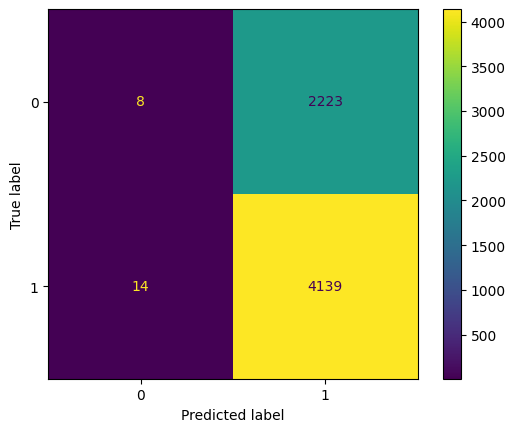

In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

accuracy, precision, recall = get_results(lr, X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

confusion_matrix_display(y_test, lr.predict(X_test))

## With GridSearch

In [28]:

# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# import matplotlib.pyplot as plt
# X_train, X_test, y_train, y_test = train_test_split(df_tranformed.drop(columns=['Status']), df_tranformed['Status'], test_size=0.2, random_state=42)

# # Postive smallest count of Status

# positive_class = y_train.value_counts().idxmin()
# negative_class = y_train.value_counts().idxmax()

# print(f'Positive Class: {positive_class}')
# print(f'Negative Class: {negative_class}', '\n')

# model = LogisticRegression()

# parameters = {
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'dual': [True, False],
#     'tol': [1e-4, 1e-3, 1e-2],
#     'C': [1.0, 0.1, 0.01],
#     'fit_intercept': [True, False],
#     'intercept_scaling': [1, 2, 3],
#     'class_weight': ['balanced', {0: 1, 1: 9}, {0: 5, 1: 5}, {0: 9, 1: 1}],
# }

# model = LogisticRegression()

# clf = GridSearchCV(model, parameters, scoring='accuracy')
# clf.fit(X_train, y_train)

# print(f'Best Parameters: {clf.best_params_}')

# best_model_logistic = clf.best_estimator_
# best_model_logistic.fit(X_train, y_train)

# y_pred = best_model_logistic.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print(f'Precision: {precision}')
# print(f'Recall: {recall}', '\n')

# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model_logistic.classes_)
# disp.plot();

## RidgeClassifier

In [29]:
from sklearn.linear_model import RidgeClassifier

## With default params

Accuracy: 0.6495927318295739
Precision: 0.6512950094756791
Recall: 0.9930170960751264


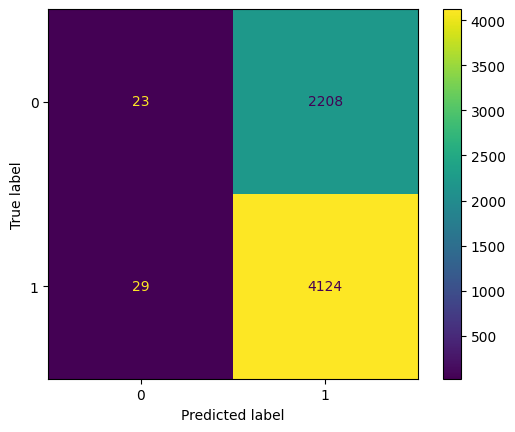

In [30]:
rc = RidgeClassifier()
rc.fit(X_train, y_train)

accuracy, precision, recall = get_results(rc, X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

confusion_matrix_display(y_test, rc.predict(X_test))

## With GridSearch

In [31]:
# from sklearn.linear_model import RidgeClassifier

# ridgeClassifierModel = RidgeClassifier()

# parameters = {
#     'alpha': [1.0, 0.1, 0.01, 0.001, 0.0001],
#     'fit_intercept': [True, False],
#     'copy_X': [True, False],
#     'max_iter': [100, 200, 300, 400, 500],
#     'tol': [1e-4, 1e-3, 1e-2, 1e-1, 1],
#     # 'class_weight': ['balanced', {0: 1, 1: 9}, {0: 5, 1: 5}, {0: 9, 1: 1}, None],
#     # 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
# }

# clf = GridSearchCV(ridgeClassifierModel, parameters, scoring='accuracy')
# clf.fit(X_train, y_train)

# print(f'Best Parameters: {clf.best_params_}')

# best_model_eidge = RidgeClassifier(**clf.best_params_)
# best_model_eidge.fit(X_train, y_train)

# y_pred = best_model_eidge.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print(f'Precision: {precision}')
# print(f'Recall: {recall}', '\n')

# print(f'Best Parameters: {clf.best_params_}')

# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model_eidge.classes_)
# disp.plot();

## SGDClassifier

In [32]:
from sklearn.linear_model import SGDClassifier

## Withy default params

Accuracy: 0.5656328320802005
Precision: 0.6704545454545454
Recall: 0.6535034914519624


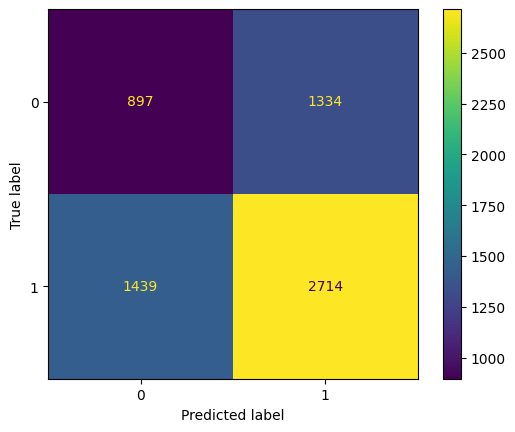

In [33]:
sgdc = SGDClassifier()
sgdc.fit(X_train, y_train)

accuracy, precision, recall = get_results(sgdc, X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

confusion_matrix_display(y_test, sgdc.predict(X_test))

In [34]:
# from sklearn.experimental import enable_halving_search_cv
# from sklearn.model_selection import HalvingGridSearchCV

# sgdClassifier = SGDClassifier()

# parameters = {
#     'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
#     'penalty': ['l2', 'l1', 'elasticnet'],
#     'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1],
#     'l1_ratio': [0.15, 0.1, 0.05, 0.01, 0.001, 1.0],
#     'tol': [1e-4, 1e-3, 1e-2, 1e-1, 1],
#     # 'shuffle': [True, False],
#     'epsilon': [0.1, 0.01, 0.001, 0.0001],
#     'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'],
#     # 'eta0': [0.1, 0.01, 0.001, 0.0001],
#     # 'power_t': [0.1, 0.01, 0.001, 0.0001],
# }

# clf = HalvingGridSearchCV(sgdClassifier, parameters, scoring='accuracy', max_resources=50)
# clf.fit(X_train, y_train)

# print(f'Best Parameters: {clf.best_params_}')

# best_model_sgd = clf.best_estimator_
# # best_model_sgd.fit(X_train, y_train)

# y_pred = best_model_sgd.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print(f'Precision: {precision}')
# print(f'Recall: {recall}', '\n')

# print(f'Best Parameters: {clf.best_params_}')

# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model_sgd.classes_)
# disp.plot();

## Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

## With default Params

Accuracy: 0.9108709273182958
Precision: 0.9336882865440465
Recall: 0.9289670117986998


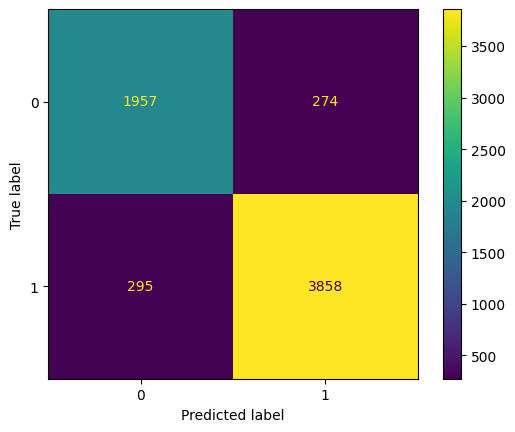

In [36]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

accuracy, precision, recall = get_results(dtc, X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

confusion_matrix_display(y_test, dtc.predict(X_test))

# Perceptron

## with default params

Accuracy: 0.6475563909774437
Precision: 0.6502922129205497
Recall: 0.9913315675415363


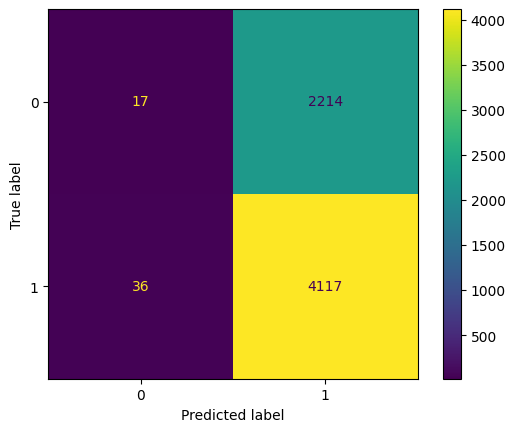

In [37]:
from sklearn.linear_model import Perceptron

perc = Perceptron()
perc.fit(X_train, y_train)

accuracy, precision, recall = get_results(perc, X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

confusion_matrix_display(y_test, perc.predict(X_test))

# PassiveAggressiveClassifier

## With default params

Accuracy: 0.3494674185463659
Precision: 0.0
Recall: 0.0


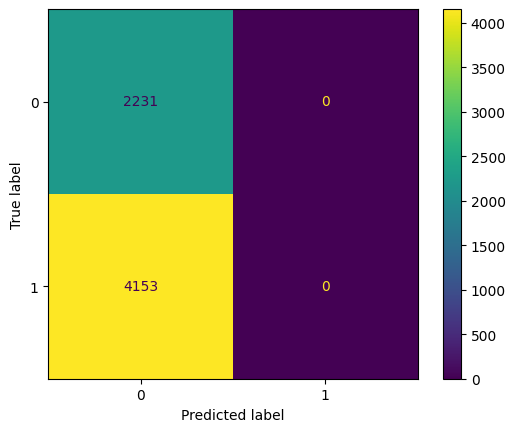

In [38]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier()
pac.fit(X_train, y_train)

accuracy, precision, recall = get_results(pac, X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

confusion_matrix_display(y_test, pac.predict(X_test))

# SVM

## With default params

Accuracy: 0.6505325814536341
Precision: 0.6505325814536341
Recall: 1.0


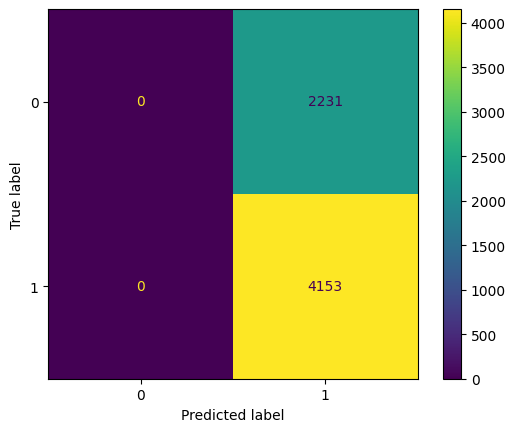

In [39]:
from sklearn import svm

svmc = svm.SVC()
svmc.fit(X_train, y_train)

accuracy, precision, recall = get_results(svmc, X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

confusion_matrix_display(y_test, svmc.predict(X_test))

# Gaussian Process --- Not running on local xD

In [40]:
# from sklearn import gaussian_process

# gpc = gaussian_process.GaussianProcessClassifier()
# gpc.fit(X_train, y_train)

# accuracy, precision, recall = get_results(gpc, X_test, y_test)
# print(f'Accuracy: {accuracy}')
# print(f'Precision: {precision}')
# print(f'Recall: {recall}')

# confusion_matrix_display(y_test, gpc.predict(X_test))

# Ensembles

## GradientBoostingClassifier

### With default params

Accuracy: 0.7037907268170426
Precision: 0.7059359067734887
Recall: 0.9335420178184445


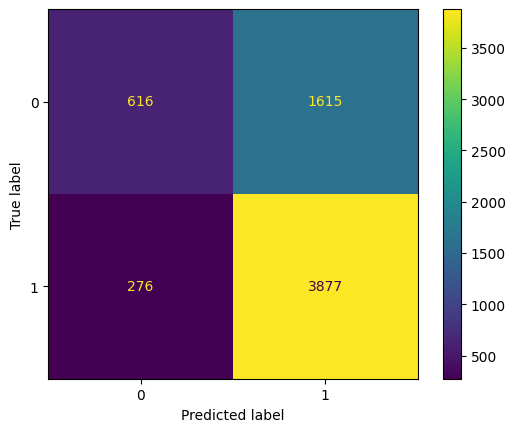

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

accuracy, precision, recall = get_results(gbc, X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

confusion_matrix_display(y_test, gbc.predict(X_test))

## HistGradientBoostingClassifier

### With default params

Accuracy: 0.7633145363408521
Precision: 0.768060064935065
Recall: 0.9113893570912593


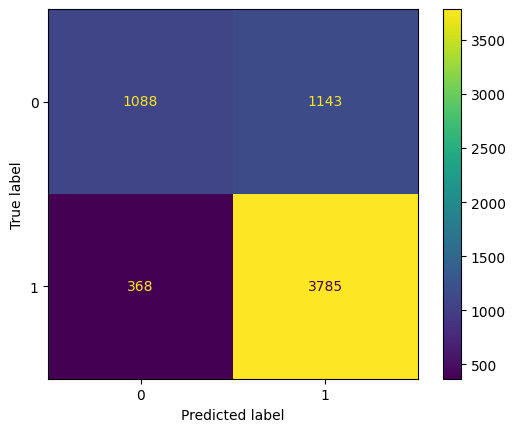

Accuracy: 0.7933897243107769
Precision: 0.8118397887323944
Recall: 0.8882735372020226


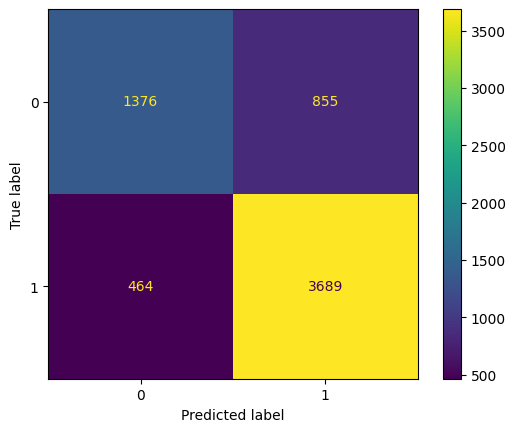

In [42]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc = HistGradientBoostingClassifier()
hgbc.fit(X_train, y_train)

accuracy, precision, recall = get_results(hgbc, X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

confusion_matrix_display(y_test, hgbc.predict(X_test))

# with categorical features

hgbcc = HistGradientBoostingClassifier(categorical_features=[0, 1])
hgbcc.fit(X_train, y_train)

accuracy, precision, recall = get_results(hgbcc, X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

confusion_matrix_display(y_test, hgbcc.predict(X_test))

## Random Forest

### Using default params

Accuracy: 0.9179197994987469
Precision: 0.9139858544375998
Recall: 0.9646039007946063


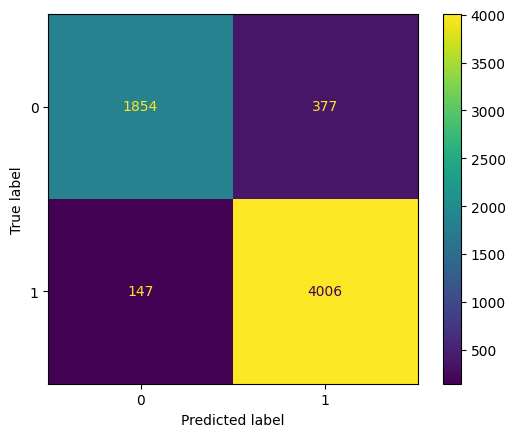

Accuracy: 0.9196428571428571
Precision: 0.9153354632587859
Recall: 0.9658078497471707


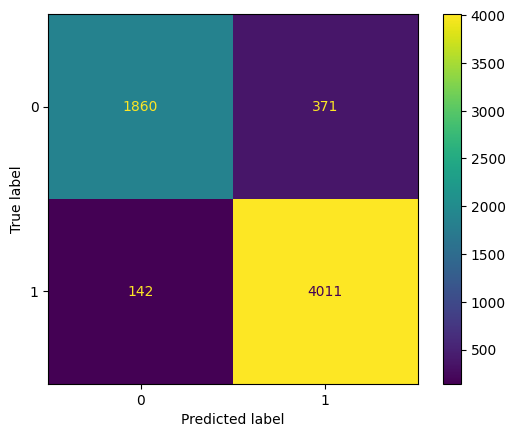

In [43]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

accuracy, precision, recall = get_results(rfc, X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

confusion_matrix_display(y_test, rfc.predict(X_test))

# extremely randomized trees

from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

accuracy, precision, recall = get_results(etc, X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

confusion_matrix_display(y_test, etc.predict(X_test))

## Baggign meta-estimator

### With default params

Accuracy: 0.9071115288220551
Precision: 0.9335119337554798
Recall: 0.9229472670358777


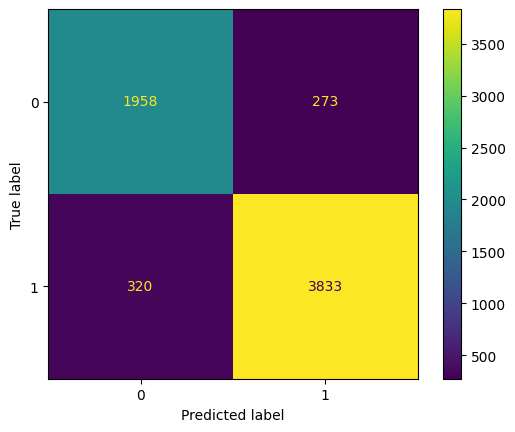

In [44]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()
bc.fit(X_train, y_train)

accuracy, precision, recall = get_results(bc, X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

confusion_matrix_display(y_test, bc.predict(X_test))

## Voting Classifier

### With default params

Accuracy: 0.9257518796992481
Precision: 0.9212273872223494
Recall: 0.9686973272333254


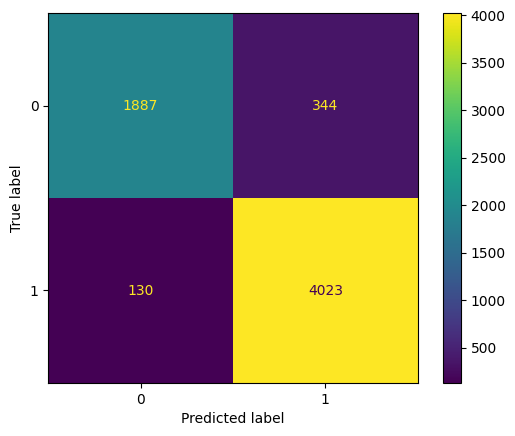

Accuracy: 0.9215225563909775
Precision: 0.9189995410738871
Recall: 0.9643631110040934


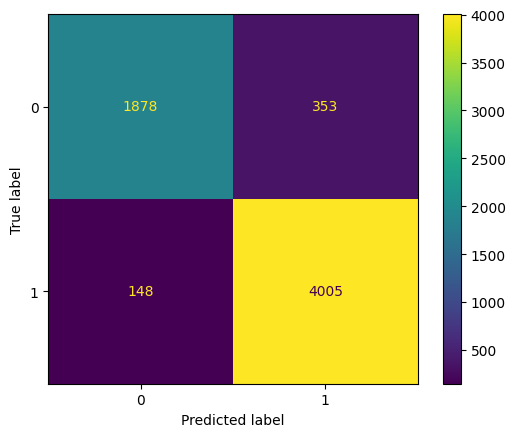

In [45]:
from sklearn.ensemble import VotingClassifier

cl1 = RandomForestClassifier()
cl2 = ExtraTreesClassifier()
cl3 = BaggingClassifier()
# cl4 = DecisionTreeClassifier()

vc = VotingClassifier(estimators=[
    ('rfc', cl1), 
    ('etc', cl2), 
    ('bc', cl3), 
    # ('dtc', cl4)
    ], voting='soft')
vc.fit(X_train, y_train)

accuracy, precision, recall = get_results(vc, X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

confusion_matrix_display(y_test, vc.predict(X_test))

# With weights

vcw = VotingClassifier(estimators=[
    ('rfc', cl1), 
    ('etc', cl2), 
    ('bc', cl3), 
    # ('dtc', cl4)
    ], voting='soft', weights=[2, 2, 2])
vcw.fit(X_train, y_train)

accuracy, precision, recall = get_results(vcw, X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

confusion_matrix_display(y_test, vcw.predict(X_test))

## Stacking Classifier

### With default params

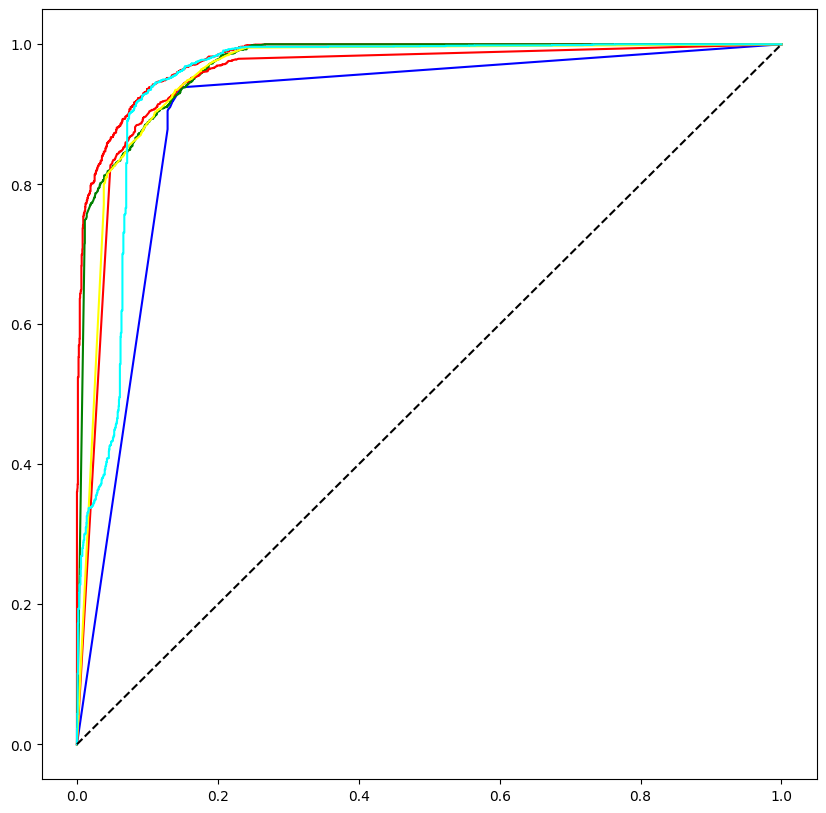

In [46]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier()),
    ('et', ExtraTreesClassifier()),
    ('bc', BaggingClassifier())
]

stack1 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack1.fit(X_train, y_train)

stack2 = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier())
stack2.fit(X_train, y_train)

stack3 = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())
stack3.fit(X_train, y_train)

stack4 = StackingClassifier(estimators=estimators, final_estimator=ExtraTreesClassifier())
stack4.fit(X_train, y_train)

stack5 = StackingClassifier(estimators=estimators, final_estimator=BaggingClassifier())
stack5.fit(X_train, y_train)

from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
stack6 = StackingClassifier(estimators=estimators, final_estimator=CalibratedClassifierCV(SVC(probability=True)))
stack6.fit(X_train, y_train)

y_pred_proba1 = stack1.predict_proba(X_test)[:, 1]
y_pred_proba2 = stack2.predict_proba(X_test)[:, 1]
y_pred_proba3 = stack3.predict_proba(X_test)[:, 1]
y_pred_proba4 = stack4.predict_proba(X_test)[:, 1]
y_pred_proba5 = stack5.predict_proba(X_test)[:, 1]
y_pred_proba6 = stack6.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, RocCurveDisplay

fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba1)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba2)
fpr3, tpr3, _ = roc_curve(y_test, y_pred_proba3)
fpr4, tpr4, _ = roc_curve(y_test, y_pred_proba4)
fpr5, tpr5, _ = roc_curve(y_test, y_pred_proba5)
fpr6, tpr6, _ = roc_curve(y_test, y_pred_proba6)

plt.figure(figsize=(10, 10))
plt.plot(fpr1, tpr1, color="red" , label='Logistic Regression')
plt.plot(fpr2, tpr2, color="blue", label='Decision Tree')
plt.plot(fpr3, tpr3, color="green", label='Random Forest')
plt.plot(fpr4, tpr4, color="red", label='Extra Trees')
plt.plot(fpr5, tpr5, color="yellow", label='Bagging Classifier')
plt.plot(fpr6, tpr6, color="cyan", label='SVM')
plt.plot([0, 1], [0, 1], 'k--')

# Concolusion: Logistic Regression is the best last_estimator

## AdaBooster

Accuracy: 0.6505325814536341
Precision: 0.6505325814536341
Recall: 1.0


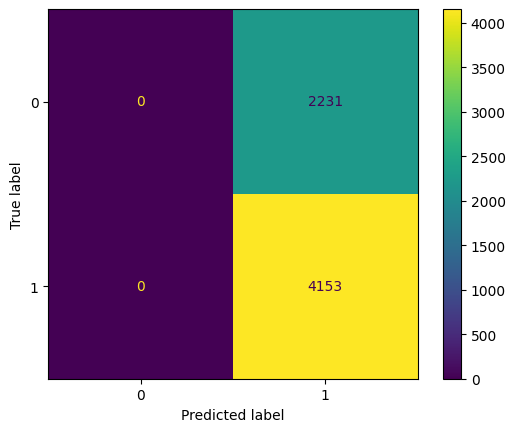

In [47]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(learning_rate=0.001, n_estimators=100, random_state=42, algorithm='SAMME')
abc.fit(X_train, y_train)

accuracy, precision, recall = get_results(abc, X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

confusion_matrix_display(y_test, abc.predict(X_test))

## Neural Networs

Accuracy: 0.6441102756892231
Precision: 0.6642794759825328
Recall: 0.9157235733204913


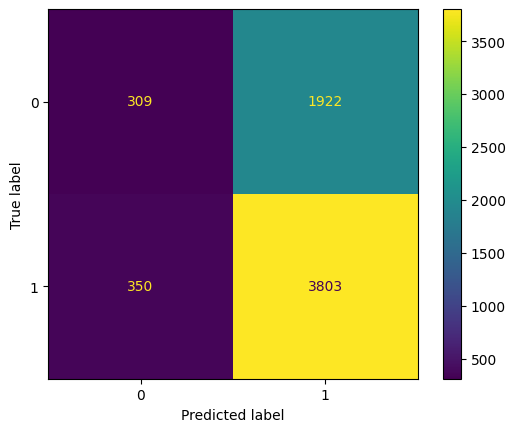

In [48]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=10000, activation='relu', solver='adam', random_state=42, learning_rate='constant', learning_rate_init=0.0001)
mlp.fit(X_train, y_train)

accuracy, precision, recall = get_results(mlp, X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

confusion_matrix_display(y_test, mlp.predict(X_test))

# ROC Curves without GridSearch

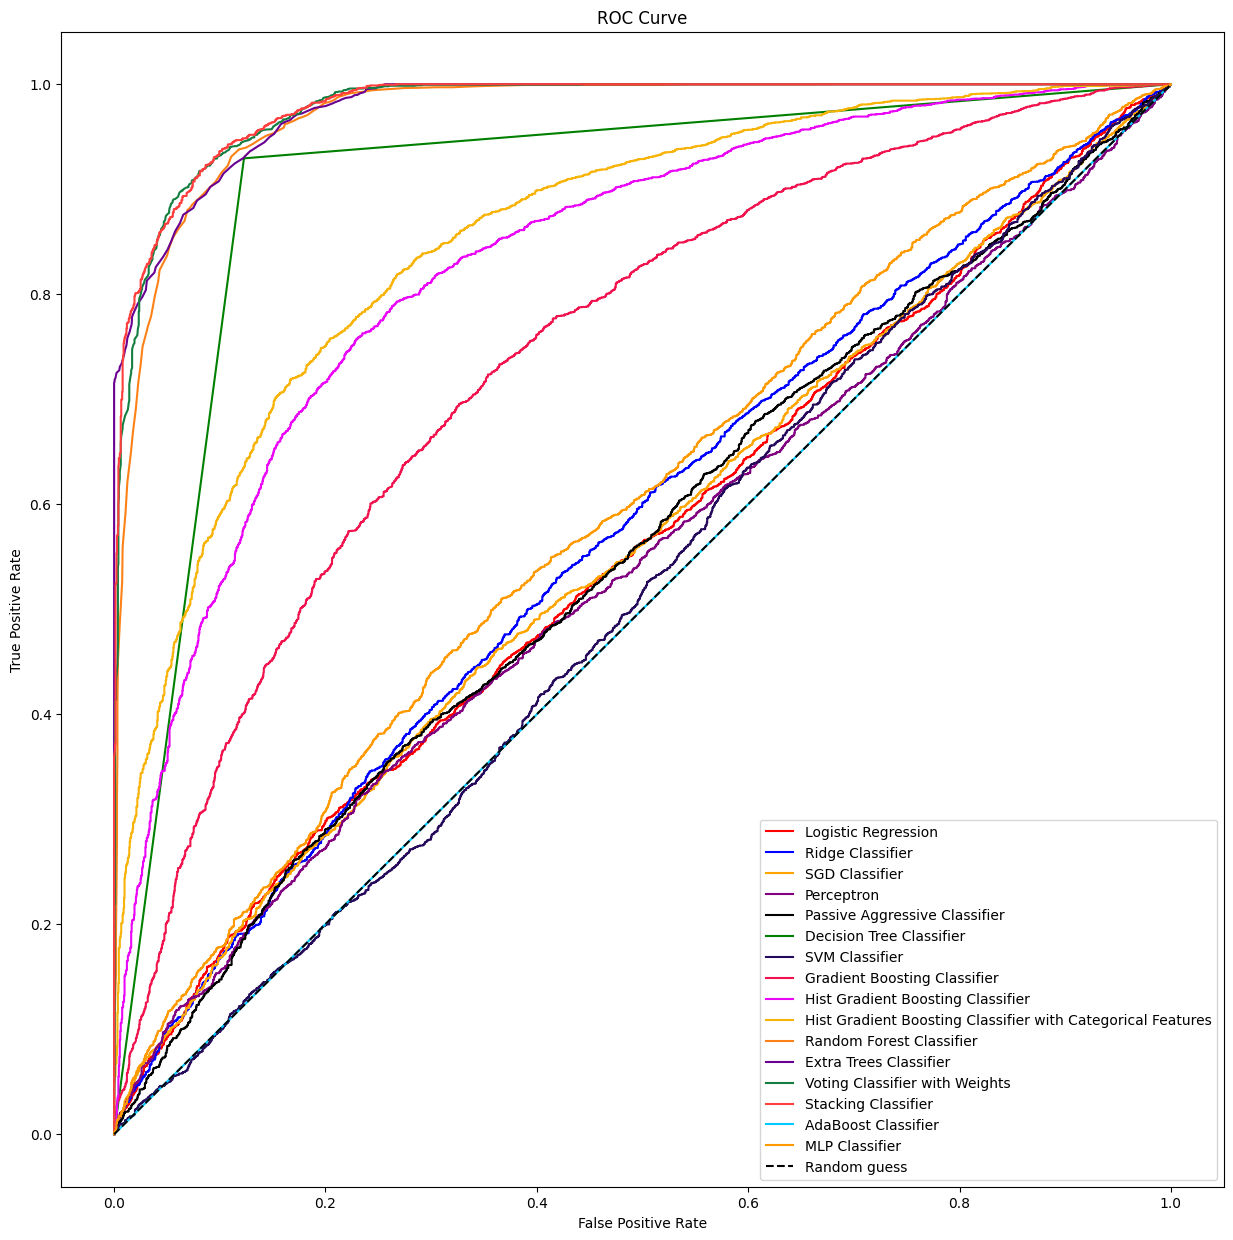

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

y_pred_proba = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Restricted for binary classification, Ideal for us
plt.plot(fpr, tpr, color='red', label='Logistic Regression')

y_pred_proba = rc.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Restricted for binary classification, Ideal for us
plt.plot(fpr, tpr, color='blue', label='Ridge Classifier')

y_pred_proba = sgdc.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Restricted for binary classification, Ideal for us
plt.plot(fpr, tpr, color='orange', label='SGD Classifier')

y_pred_proba = perc.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Restricted for binary classification, Ideal for us
plt.plot(fpr, tpr, color='purple', label='Perceptron')

y_pred_proba = pac.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Restricted for binary classification, Ideal for us
plt.plot(fpr, tpr, color='black', label='Passive Aggressive Classifier')

y_pred_proba = dtc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Restricted for binary classification, Ideal for us
plt.plot(fpr, tpr, color='green', label='Decision Tree Classifier')

y_pred_proba = svmc.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Restricted for binary classification, Ideal for us
plt.plot(fpr, tpr, color='#25095a', label='SVM Classifier')

# y_pred_proba = gpc.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Restricted for binary classification, Ideal for us
# plt.plot(fpr, tpr, color='#044c4b', label='Gaussian Process Classifier')

y_pred_proba = gbc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Restricted for binary classification, Ideal for us
plt.plot(fpr, tpr, color='#f0134d', label='Gradient Boosting Classifier')

y_pred_proba = hgbc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Restricted for binary classification, Ideal for us
plt.plot(fpr, tpr, color='#ea07f7', label='Hist Gradient Boosting Classifier')

y_pred_proba = hgbcc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Restricted for binary classification, Ideal for us
plt.plot(fpr, tpr, color='#f7b307', label='Hist Gradient Boosting Classifier with Categorical Features')

y_pred_proba = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Restricted for binary classification, Ideal for us
plt.plot(fpr, tpr, color='#fd8116', label='Random Forest Classifier')

y_pred_proba = etc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Restricted for binary classification, Ideal for us
plt.plot(fpr, tpr, color='#690091', label='Extra Trees Classifier')

# y_pred_proba = bc.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Restricted for binary classification, Ideal for us
# plt.plot(fpr, tpr, color='#914900', label='Bagging Classifier')

# y_pred_proba = vc.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# plt.plot(fpr, tpr, color='#e92874', label='Voting Classifier')

y_pred_proba = vcw.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='#137e40', label='Voting Classifier with Weights')

y_pred_proba = stack1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='#ff3e3e', label='Stacking Classifier')

y_pred_proba = abc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='#00cafe', label='AdaBoost Classifier')

y_pred_proba = mlp.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='#fe9a00', label='MLP Classifier')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ROC Curvs with GridSearch

In [50]:
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt

# y_pred_proba = best_model_logistic.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Restricted for binary classification, Ideal for us
# plt.plot(fpr, tpr, color='red', label='Logistic Regression')

# y_pred_proba = best_model_eidge.decision_function(X_test)
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Restricted for binary classification, Ideal for us
# plt.plot(fpr, tpr, color='blue', label='Ridge Classifier')

# y_pred_proba = best_model_sgd.decision_function(X_test)
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Restricted for binary classification, Ideal for us
# plt.plot(fpr, tpr, color='orange', label='SGD Classifier')

# y_pred_proba = dtc.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Restricted for binary classification, Ideal for us
# plt.plot(fpr, tpr, color='green', label='Decision Tree Classifier')

# plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend()
# plt.show()

# To get the university/major and their respective code.

In [24]:
import csv

# Write University List and Encoded Codes to CSV
with open('universities.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['University', 'Encoded_Code'])
    for university, code in zip(universities_list, encoded_universities):
        writer.writerow([university, code])

# Write Target Major List and Encoded Codes to CSV
with open('target_majors.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Target_Major', 'Encoded_Code'])
    for major, code in zip(major_list, encoded_major):
        writer.writerow([major, code])
